In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
hep.style.use("CMS")

Simulación con mismas masas:
- Uno con gsg=1, otros 0.
- Uno con gsg=0, gsq=1.

In [2]:
# Set the number of jets you want to take into account in your analysis
n_jets = 4
n_lep = 0

#fname = "../../../Work/MadGraph/MG5_aMC_v3_5_0/projectAdvancedv01/Events/run_01/tag_1_delphes_events.root"
fname = "./tag_1_delphes_events.root"

tree_test = dm.Converter(fname)
tree_test.generate(jet_elements=n_jets, e_mu_elements=n_lep)
df = tree_test.df

In [3]:
df

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,500.014740,448.527130,88.656395,80.066177,-0.157671,0.694387,1.973156,-1.355895,-2.980467,0.152537,...,0,0,0,0,0,0,0,0,11.665068,-2.857030
1,321.937744,226.314911,34.217468,32.210209,-0.065539,2.394826,3.652451,2.937630,-0.535384,2.478980,...,0,0,0,0,0,0,0,0,10.938969,-0.292248
2,505.367371,373.851105,112.324127,25.208542,0.019492,1.052908,-0.417432,0.473038,1.355175,-1.760740,...,0,0,0,0,0,0,0,0,3.429858,1.506035
3,501.732544,446.338013,85.998695,68.546700,-0.049092,-0.686467,0.606633,-3.213395,-3.132744,-0.069141,...,0,0,0,0,1,0,0,0,3.736499,-1.211341
4,862.775879,657.257263,311.441254,248.552292,-0.796236,-1.549898,0.056478,-1.291885,1.794896,-1.682795,...,0,0,0,0,0,0,0,0,26.697710,-3.096102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,528.693909,501.168640,138.251495,127.014046,-0.918824,-1.415446,0.066196,1.519709,1.482067,-2.208066,...,0,0,0,0,0,0,0,0,14.561893,-0.221878
49996,241.954025,181.670563,57.651573,55.399498,1.361272,-1.686845,3.476286,-0.784247,-0.500950,2.118011,...,0,0,0,0,0,0,0,0,2.007139,0.288719
49997,453.664459,313.914429,141.112518,41.560452,2.173498,0.539196,1.482421,2.047513,1.579009,-1.126998,...,0,0,0,0,0,0,0,0,10.589142,1.249440
49998,163.823196,130.321304,120.551308,64.349068,1.423703,-2.435989,-0.274423,-4.467600,-1.844064,2.319032,...,0,0,0,0,0,0,0,0,7.900098,2.886127


In [4]:
df.query('missinget_met > 50 &\
         jet_eta0*jet_eta1 < 0 &\
         (jet_pt0 > 30 | jet_pt1 > 30) &\
         (-5 < jet_eta0 < 5 | -5 < jet_eta1 < 5) &\
         jet_pt0 + jet_pt1 > 200', inplace = True)

In [22]:
df

,jet_pt0,jet_pt1,jet_eta0,jet_eta1,jet_phi0,jet_phi1,jet_mass0,jet_mass1,jet_btag0,jet_btag1,jet_tautag0,jet_tautag1,missinget_met,missinget_phi,Azimuthal_difference,Invariant_mass,Pseudorapidity
15,431.842743,203.251999,0.905360,-1.366401,-2.953140,0.169203,28.482031,9.973013,0,0,0,0,105.304230,-0.403621,3.122343,NaN,2.271761
19,312.780304,142.425293,0.290333,-2.188101,0.400484,-2.519490,12.809831,26.028053,0,0,0,0,59.396210,-2.542789,2.919974,NaN,2.478434
25,509.946960,318.311584,-0.953757,0.490439,-0.329095,2.405039,16.843634,12.566870,0,0,0,0,90.788940,-2.034872,2.734134,NaN,1.444196
93,733.050842,494.616852,-0.580282,0.746351,-0.096502,2.573599,16.847099,50.982723,0,0,0,0,51.309330,-0.537196,2.670100,NaN,1.326633
102,689.410583,360.952026,-1.479580,0.022893,-2.812007,1.805900,15.608875,33.722721,0,0,0,0,84.353172,1.976285,4.617907,NaN,1.502473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49842,711.991943,486.913361,-0.293138,0.725526,-1.725969,0.669575,50.246315,12.356811,0,0,0,0,116.986435,1.508970,2.395543,NaN,1.018664
49883,634.065369,341.188660,-0.044269,0.891753,-2.432900,1.064530,10.204766,10.683591,0,0,0,0,88.994133,-0.484884,3.497430,NaN,0.936022
49896,582.773987,425.344818,-0.234066,0.292212,-2.887525,-0.258289,21.291031,10.165743,0,0,0,0,52.982841,0.752972,2.629236,NaN,0.526277
49969,681.573364,655.219788,0.153604,-1.250056,-0.001236,3.023995,129.701385,62.337402,0,0,0,0,182.537613,0.122770,3.025230,NaN,1.403659


Graficar las variables cinemáticas (pt, eta, phi) tambíen la masa de cada jet.

También missing energy y ángulo azimutal missing energy.

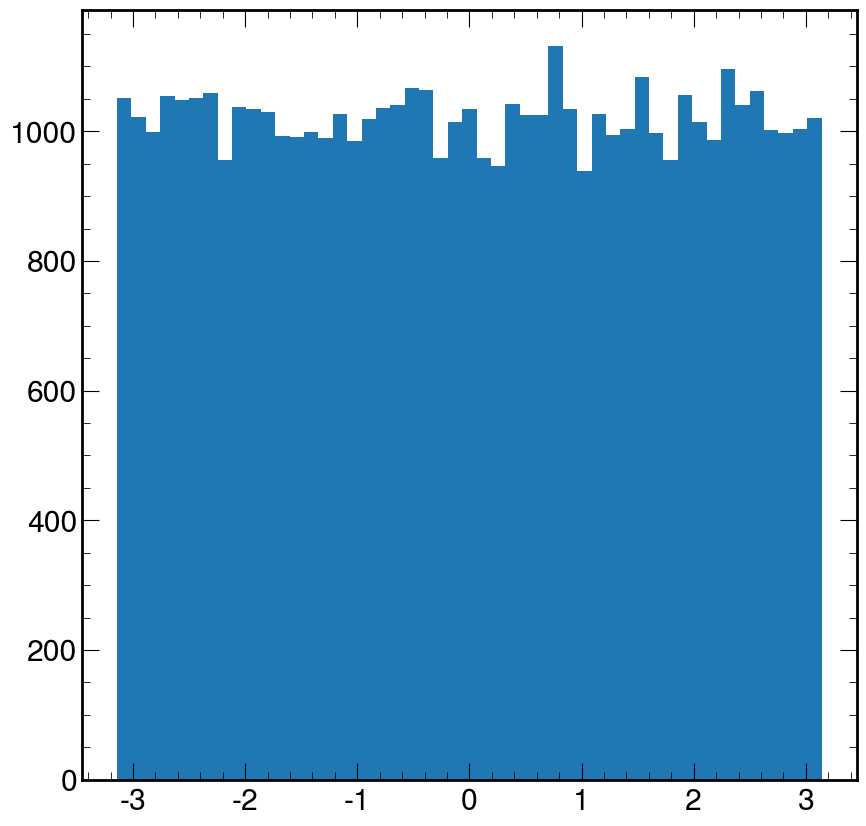

In [5]:
rango = np.linspace(df.jet_phi0.min(), df.jet_phi0.max())
plt.hist(df.jet_phi0, bins = rango)
plt.show()

In [21]:
def azimuthal_difference(row):
    deltaPhi = abs(row['jet_phi0'] - row['jet_phi1'])
    return deltaPhi

def invariant_mass(row):
    m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
                (np.cosh(row['jet_eta0'] - row['jet_eta1']) - \
                 np.cosh(row['jet_phi0'] - row['jet_phi1'])))
    return m

def pseudorapidity_separation(row):
    deltaEta = abs(row['jet_eta0'] - row['jet_eta1'])
    return deltaEta

df['Azimuthal_difference'] = df.apply(azimuthal_difference, axis=1)
df['Invariant_mass'] = df.apply(invariant_mass, axis = 1)
df['Pseudorapidity'] = df.apply(pseudorapidity_separation, axis = 1)

/tmp/ipykernel_6785/3315483991.py:6: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \


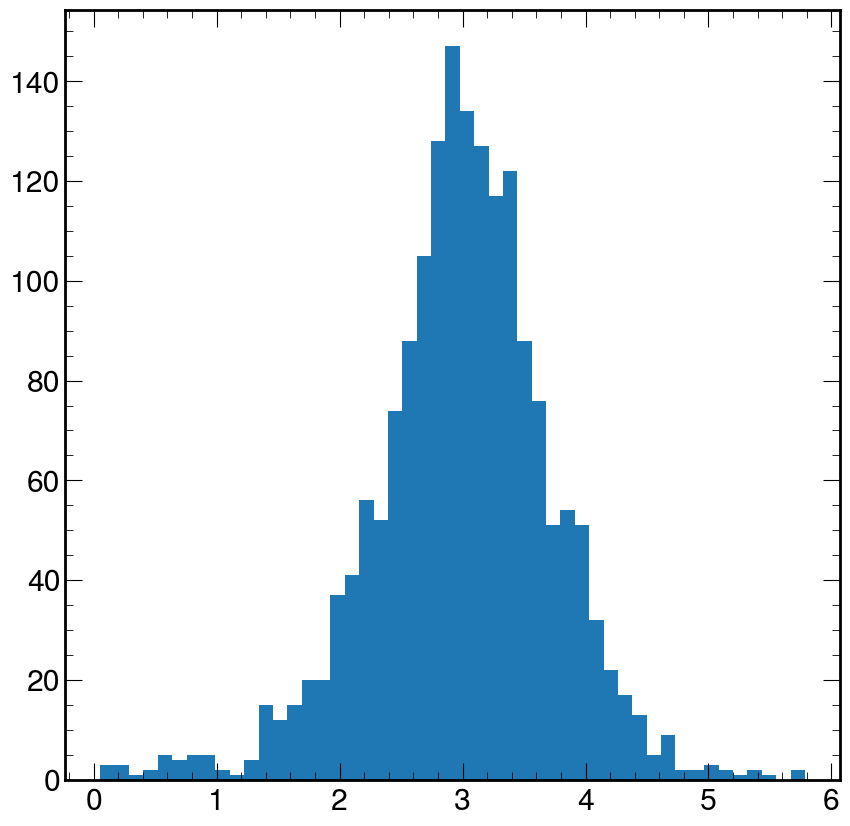

In [23]:
rango = np.linspace(df.Azimuthal_difference.min(), df.Azimuthal_difference.max())
plt.hist(df.Azimuthal_difference, bins = rango)
plt.show()

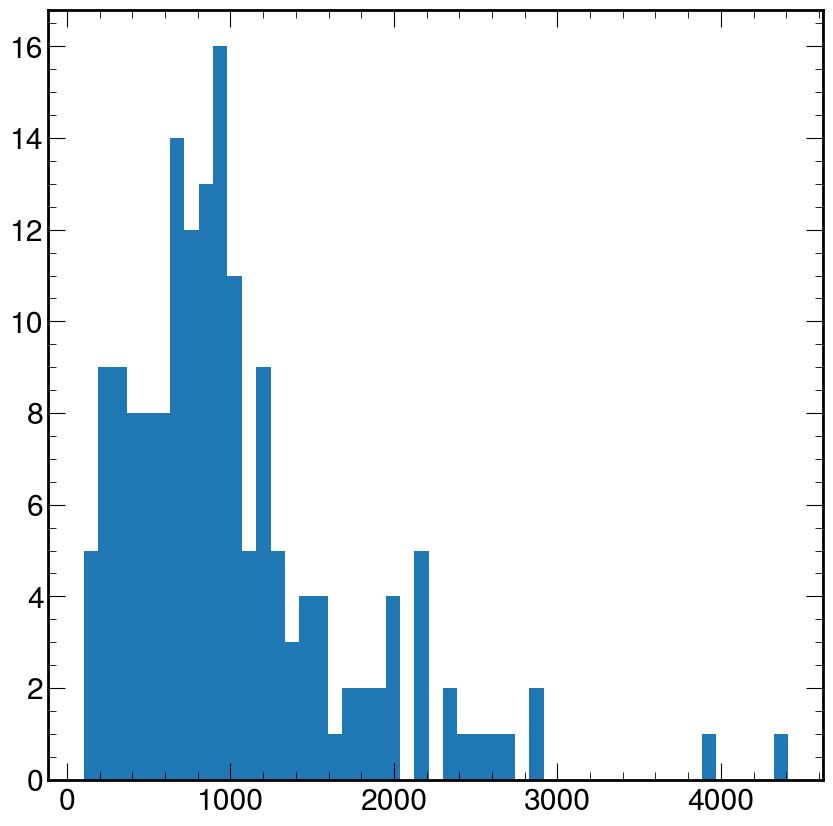

In [24]:
rango = np.linspace(df.Invariant_mass.min(), df.Invariant_mass.max())

plt.hist(df.Invariant_mass, bins = rango)
plt.show()

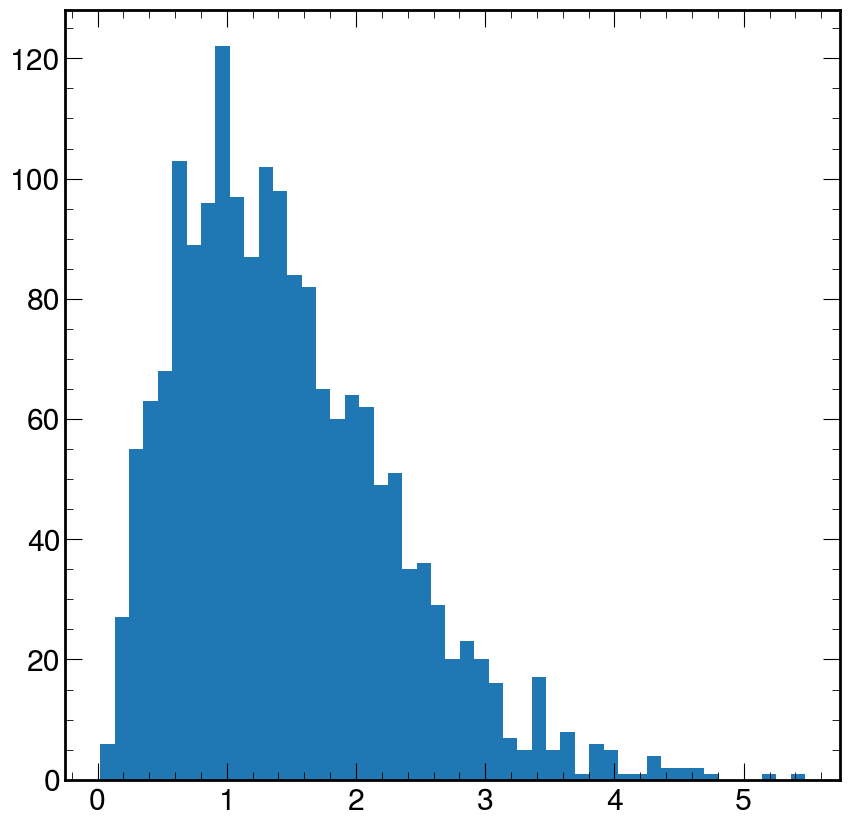

In [25]:
rango = np.linspace(df.Pseudorapidity.min(), df.Pseudorapidity.max())
plt.hist(df.Pseudorapidity, bins=rango)
plt.show()